In [143]:
#Data Analysis Libraries
import pandas as pd
import numpy as np

#Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Ignore Warnings
import warnings
warnings.filterwarnings('ignore')


In [144]:
#Import train and test CSV file
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [145]:
#Look training dataset
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [146]:
#Look testing dataset
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [147]:
#Look statistics describe training dataset
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**3) DATA ANALYSIS**

In [148]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We know
*   Categorical Variables: Survived(integer), Sex(string), Pclass(integer), Embarked(string)
*   Numerical Variables: Age(float), Fare(float), Sibsp(integer), dan Parch(integer)
*   Unique Variables: PassengerId(string), Name(string), Ticket(string), Cabin(string)


In [149]:
#Get a count of the number of categorical variables
def numbercategorical(variable):
   var = train_df[variable]
   varValue = var.value_counts()

   print('{} \n{} \n'.format(variable, varValue))

category = ['Survived', 'Sex', 'Pclass', 'Embarked']
for i in category:
  numbercategorical(i)

Survived 
0    549
1    342
Name: Survived, dtype: int64 

Sex 
male      577
female    314
Name: Sex, dtype: int64 

Pclass 
3    491
1    216
2    184
Name: Pclass, dtype: int64 

Embarked 
S    644
C    168
Q     77
Name: Embarked, dtype: int64 



In [150]:
#Sort the ages into logical categories
train_df["Age"] = train_df["Age"].fillna(-0.5)
test_df["Age"] = test_df["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train_df['AgeGroup'] = pd.cut(train_df["Age"], bins, labels = labels)
test_df['AgeGroup'] = pd.cut(test_df["Age"], bins, labels = labels)

print(train_df['AgeGroup'])

0          Student
1            Adult
2      Young Adult
3      Young Adult
4      Young Adult
          ...     
886    Young Adult
887        Student
888        Unknown
889    Young Adult
890    Young Adult
Name: AgeGroup, Length: 891, dtype: category
Categories (8, object): ['Unknown' < 'Baby' < 'Child' < 'Teenager' < 'Student' < 'Young Adult' < 'Adult' <
                         'Senior']


In [151]:
#Get a count of the number of numerical variables
def numbernumerical(variable):
   var = train_df[variable]
   varValue = var.value_counts()

   print('{} \n{} \n'.format(variable, varValue))

numerical = ['AgeGroup', 'Fare', 'SibSp', 'Parch']
for i in numerical:
  numbernumerical(i)

AgeGroup 
Young Adult    220
Adult          195
Unknown        177
Student        138
Teenager        70
Baby            44
Child           25
Senior          22
Name: AgeGroup, dtype: int64 

Fare 
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64 

SibSp 
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64 

Parch 
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64 



In [152]:
#Get a count of the number of numerical variables
def numberalphanumeric(variable):
   var = train_df[variable]
   varValue = var.value_counts()

   print('{} \n{} \n'.format(variable, varValue))

alphanumeric = ['Ticket', 'Cabin']
for i in alphanumeric:
  numberalphanumeric(i)

Ticket 
1601          7
CA. 2343      7
347082        7
CA 2144       6
3101295       6
             ..
PC 17756      1
4138          1
4137          1
14312         1
C.A. 18723    1
Name: Ticket, Length: 681, dtype: int64 

Cabin 
C23 C25 C27    4
B96 B98        4
G6             4
F33            3
C22 C26        3
              ..
D37            1
D56            1
B73            1
C54            1
A5             1
Name: Cabin, Length: 147, dtype: int64 



**4) Data Visualization**

<function print>

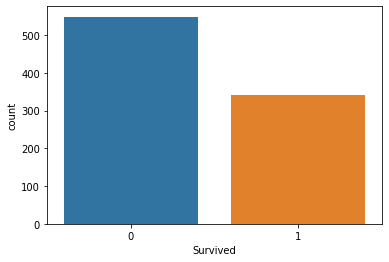

In [153]:
#Visualize the count of survivors
sns.countplot(train_df['Survived'])

print

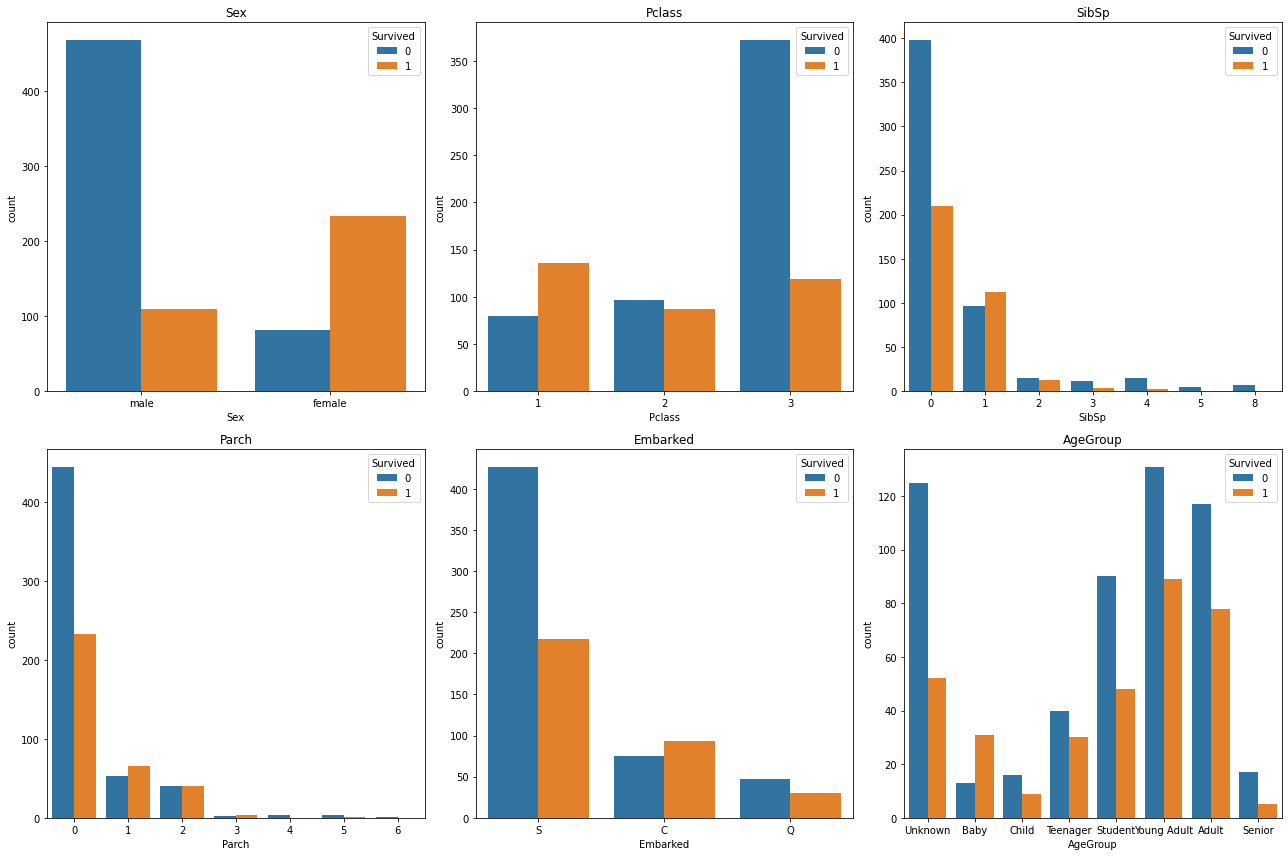

In [154]:
#Visualize the count of survivors for columns 'Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked'
cols = ['Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked', 'AgeGroup']

n_rows = 2
n_cols = 3

#The subplot grid and figure size of each graph
fig, axs = plt.subplots(n_rows, n_cols, figsize = (n_cols * 6, n_rows * 6) )

for r in range(0, n_rows):
  for c in range(0, n_cols):

    i = r*n_cols + c #index to go through the number of columns
    ax = axs[r][c] #show where position each sub plot
    sns.countplot(train_df[cols[i]], hue= train_df['Survived'], ax=ax)
    ax.set_title(cols[i])
    ax.legend(title="Survived", loc = 'upper right')

plt.tight_layout()

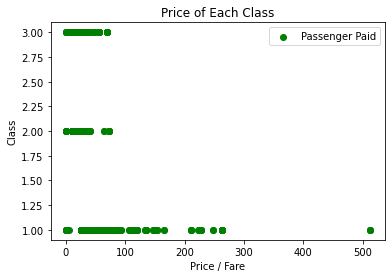

In [155]:
#Plot the prices paid of each class
plt.scatter(train_df["Fare"], train_df['Pclass'], color = 'green', label='Passenger Paid')
plt.ylabel('Class')
plt.xlabel('Price / Fare')
plt.title('Price of Each Class')
plt.legend()
plt.show()

In [156]:
#Get a count of the number of numerical variables
def mean(variable):
   var = train_df[[variable,'Survived']].groupby(variable, as_index = False)
   mean = var.mean().sort_values(by='Survived', ascending = False)

   print('Percentage of {} who survived \n {} \n'.format(variable, mean))

cols = ['Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked', 'AgeGroup']
for i in cols:
  mean(i)

Percentage of Sex who survived 
       Sex  Survived
0  female  0.742038
1    male  0.188908 

Percentage of Pclass who survived 
    Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363 

Percentage of SibSp who survived 
    SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000 

Percentage of Parch who survived 
    Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000 

Percentage of Embarked who survived 
   Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957 

Percentage of AgeGroup who survived 
       AgeGroup  Survived
1         Baby  0.704545
3     Teenager  0.428571
5  Young Adult  0.404545
6        Adult  0.400000
2        Child  0.360000
4      Student  0.347826
0      Unknown  0.293785
7       Senior  0.227273 



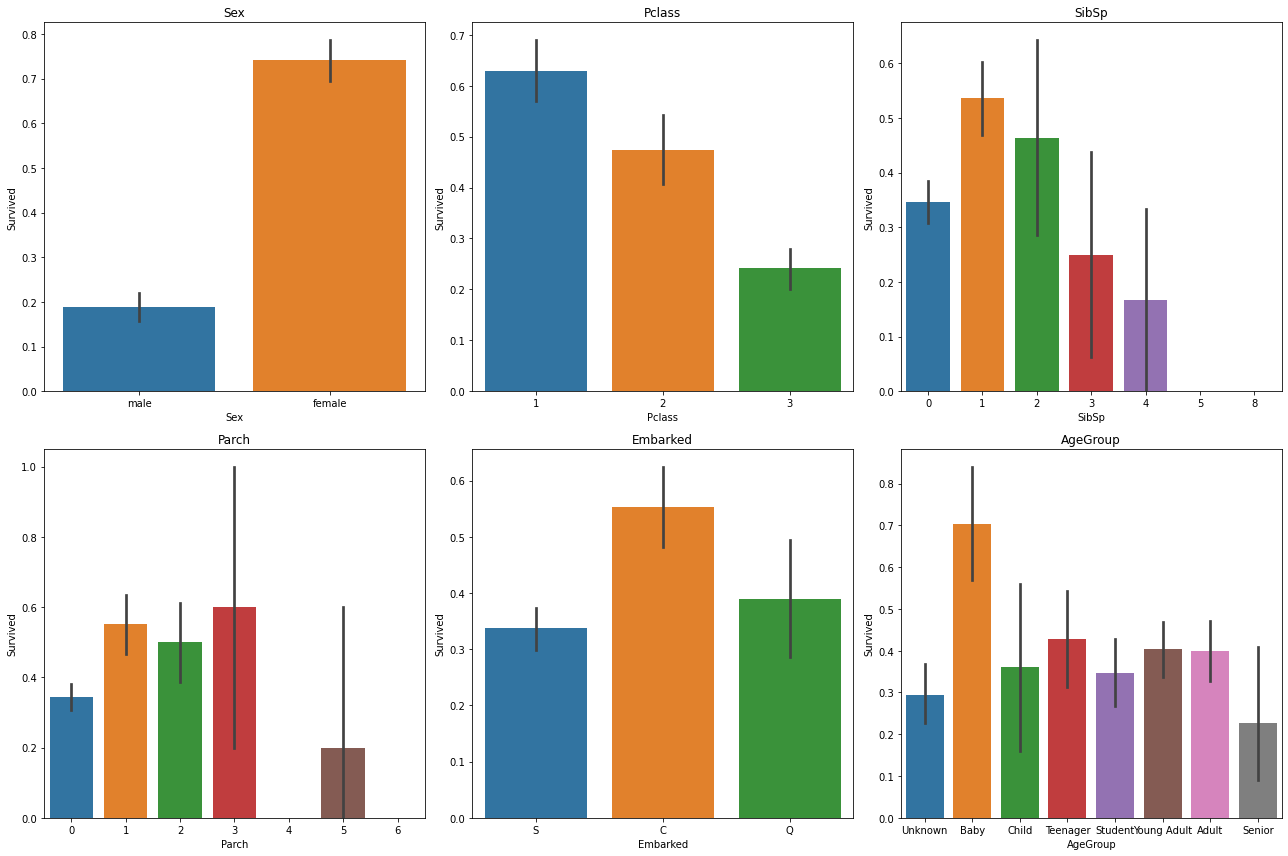

In [157]:
#Visualize the count of survivors for columns 'Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked'
cols = ['Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked', 'AgeGroup']

n_rows = 2
n_cols = 3

#The subplot grid and figure size of each graph
fig, axs = plt.subplots(n_rows, n_cols, figsize = (n_cols * 6, n_rows * 6) )

for r in range(0, n_rows):
  for c in range(0, n_cols):

    i = r*n_cols + c #index to go through the number of columns
    ax = axs[r][c] #show where position each sub plot
    sns.barplot(x=train_df[cols[i]], y=train_df["Survived"], data=train_df, ax=ax)
    ax.set_title(cols[i])
    
plt.tight_layout()

**Cleaning Data**

In [158]:
test_df.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
count,418.000000,418.000000,418,418,418.000000,418.000000,418.000000,418,417.000000,91,418,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3,8
top,NaN,NaN,"Ryan, Mr. Edward",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S,Young Adult
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270,96
mean,1100.500000,2.265550,NaN,NaN,23.941388,0.447368,0.392344,NaN,35.627188,NaN,NaN,NaN
std,120.810458,0.841838,NaN,NaN,17.741080,0.896760,0.981429,NaN,55.907576,NaN,NaN,NaN
min,892.000000,1.000000,NaN,NaN,-0.500000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,9.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,24.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,35.750000,1.000000,0.000000,NaN,31.500000,NaN,NaN,NaN


In [159]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
AgeGroup         0
dtype: int64

In [160]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
AgeGroup         0
dtype: int64

In [161]:
#we'll start off by dropping the Cabin feature since not a lot more useful information can be extracted from it.
train_df = train_df.drop(['Cabin'], axis = 1)
test_df = test_df.drop(['Cabin'], axis = 1)

In [162]:
#we can also drop the Ticket feature since it's unlikely to yield any useful information
train_df = train_df.drop(['Ticket'], axis = 1)
test_df = test_df.drop(['Ticket'], axis = 1)

In [163]:
#Missing value kolom Embarked
modus = train_df['Embarked'].mode()[0]
train_df['Embarked'] = train_df['Embarked'].fillna(modus)
train_df['Embarked'].isna().sum()

0

In [164]:
print(train_df)

     PassengerId  Survived  Pclass  ...     Fare Embarked     AgeGroup
0              1         0       3  ...   7.2500        S      Student
1              2         1       1  ...  71.2833        C        Adult
2              3         1       3  ...   7.9250        S  Young Adult
3              4         1       1  ...  53.1000        S  Young Adult
4              5         0       3  ...   8.0500        S  Young Adult
..           ...       ...     ...  ...      ...      ...          ...
886          887         0       2  ...  13.0000        S  Young Adult
887          888         1       1  ...  30.0000        S      Student
888          889         0       3  ...  23.4500        S      Unknown
889          890         1       1  ...  30.0000        C  Young Adult
890          891         0       3  ...   7.7500        Q  Young Adult

[891 rows x 11 columns]


In [165]:
print(test_df)

     PassengerId  Pclass  ... Embarked     AgeGroup
0            892       3  ...        Q  Young Adult
1            893       3  ...        S        Adult
2            894       2  ...        Q       Senior
3            895       3  ...        S  Young Adult
4            896       3  ...        S      Student
..           ...     ...  ...      ...          ...
413         1305       3  ...        S      Unknown
414         1306       1  ...        C        Adult
415         1307       3  ...        S        Adult
416         1308       3  ...        S      Unknown
417         1309       3  ...        C      Unknown

[418 rows x 10 columns]


In [166]:
train_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
AgeGroup       0
dtype: int64

In [167]:
test_df.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
AgeGroup       0
dtype: int64

In [168]:
#create a combined group of both datasets
combine = [train_df, test_df]

#extract a title for each Name in the train and test datasets
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [169]:
#replace various titles with more common names
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [170]:
#map each of the title groups to a numerical value
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Student,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Young Adult,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Young Adult,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Young Adult,1


In [171]:
# fill missing age with mode age group for each title
mr_age = train_df[train_df["Title"] == 1]["AgeGroup"].mode() #Young Adult
miss_age = train_df[train_df["Title"] == 2]["AgeGroup"].mode() #Student
mrs_age = train_df[train_df["Title"] == 3]["AgeGroup"].mode() #Adult
master_age = train_df[train_df["Title"] == 4]["AgeGroup"].mode() #Baby
royal_age = train_df[train_df["Title"] == 5]["AgeGroup"].mode() #Adult
rare_age = train_df[train_df["Title"] == 6]["AgeGroup"].mode() #Adult

age_title_mapping = {1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}

for x in range(len(train_df["AgeGroup"])):
    if train_df["AgeGroup"][x] == "Unknown":
        train_df["AgeGroup"][x] = age_title_mapping[train_df["Title"][x]]
        
for x in range(len(test_df["AgeGroup"])):
    if test_df["AgeGroup"][x] == "Unknown":
        test_df["AgeGroup"][x] = age_title_mapping[test_df["Title"][x]]

In [172]:
#map each Age value to a numerical value
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
train_df['AgeGroup'] = train_df['AgeGroup'].map(age_mapping)
test_df['AgeGroup'] = test_df['AgeGroup'].map(age_mapping)

train_df.head()

#dropping the Age feature for now, might change
train_df = train_df.drop(['Age'], axis = 1)
test_df = test_df.drop(['Age'], axis = 1)

In [173]:
#drop the name feature since it contains no more useful information.
train_df = train_df.drop(['Name'], axis = 1)
test_df = test_df.drop(['Name'], axis = 1)

In [174]:
#map each Sex value to a numerical value
sex_mapping = {"male": 0, "female": 1}
train_df['Sex'] = train_df['Sex'].map(sex_mapping)
test_df['Sex'] = test_df['Sex'].map(sex_mapping)

train_df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,Title
0,1,0,3,0,1,0,7.2500,S,4.0,1
1,2,1,1,1,1,0,71.2833,C,6.0,3
2,3,1,3,1,0,0,7.9250,S,5.0,2
3,4,1,1,1,1,0,53.1000,S,5.0,3
4,5,0,3,0,0,0,8.0500,S,5.0,1


In [178]:
#map each Embarked value to a numerical value
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train_df['Embarked'] = train_df['Embarked'].map(embarked_mapping)
test_df['Embarked'] = test_df['Embarked'].map(embarked_mapping)

train_df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,Title
0,1,0,3,0,1,0,7.2500,1,4.0,1
1,2,1,1,1,1,0,71.2833,2,6.0,3
2,3,1,3,1,0,0,7.9250,1,5.0,2
3,4,1,1,1,1,0,53.1000,1,5.0,3
4,5,0,3,0,0,0,8.0500,1,5.0,1


In [179]:
#fill in missing Fare value in test set based on mean fare for that Pclass 
for x in range(len(test_df["Fare"])):
    if pd.isnull(test_df["Fare"][x]):
        pclass = test_df["Pclass"][x] #Pclass = 3
        test_df["Fare"][x] = round(train_df[train_df["Pclass"] == pclass]["Fare"].mean(), 4)
        
#map Fare values into groups of numerical values
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4, labels = [1, 2, 3, 4])
test_df['FareBand'] = pd.qcut(test_df['Fare'], 4, labels = [1, 2, 3, 4])

#drop Fare values
train_df = train_df.drop(['Fare'], axis = 1)
test_df = test_df.drop(['Fare'], axis = 1)

In [180]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,Title,FareBand
0,1,0,3,0,1,0,1,4.0,1,1
1,2,1,1,1,1,0,2,6.0,3,4
2,3,1,3,1,0,0,1,5.0,2,2
3,4,1,1,1,1,0,1,5.0,3,4
4,5,0,3,0,0,0,1,5.0,1,2


In [181]:
#drop Fare values
train_df = train_df.drop(['PassengerId'], axis = 1)
test_df = test_df.drop(['PassengerId'], axis = 1)

In [182]:
train_df

,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,Title,FareBand
0,0,3,0,1,0,1,4.0,1,1
1,1,1,1,1,0,2,6.0,3,4
2,1,3,1,0,0,1,5.0,2,2
3,1,1,1,1,0,1,5.0,3,4
4,0,3,0,0,0,1,5.0,1,2
...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,0,1,5.0,6,2
887,1,1,1,0,0,1,4.0,2,3
888,0,3,1,1,2,1,4.0,2,3
889,1,1,0,0,0,2,5.0,1,3


In [184]:
#Split the data into independent 'X' and dependent 'Y' variables
X = train_df.iloc[:, 1:8].values
Y = train_df.iloc[:, 0].values

In [195]:
#Split the dataset into 80% training and 20% testing
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [194]:
#Scale data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.fit_transform(X_val)

In [ ]:
#Create a function with any Machine Learning models
def models(X_train, Y_train):

  #Use Logistic Regression
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 0)
  log.fit(X_train, Y_train)

  #Use KNeighbors
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, Y_train)

  #Use SVC (linier kernel)
  from sklearn.svm import SVC
  svc_lin = SVC(kernel = 'linear', random_state = 0)
  svc_lin.fit(X_train, Y_train)

  #Use SVC (RBF Kernel)
  from sklearn.svm import SVC
  svc_rbf = SVC(kernel = 'rbf', random_state = 0)
  svc_rbf.fit(X_train, Y_train)

  #Use GaussianNB
  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(X_train, Y_train)

  #Use Decision Tree
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train)

  #Use the RandomForestClassifier
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train)

  #Print the training accuracy for each model
  print('[0]Logistic Regression Training Accuracy', log.score(X_train, Y_train))
  print('[1]K Neighbors Training Accuracy', knn.score(X_train, Y_train))
  print('[2]SVC Linear Training Accuracy', svc_lin.score(X_train, Y_train))
  print('[3]SVC RBF Training Accuracy',svc_rbf.score(X_train, Y_train))
  print('[4]Gaussian NB Regression Training Accuracy', gauss.score(X_train, Y_train))
  print('[5]Decision Tree Training Accuracy', tree.score(X_train, Y_train))
  print('[6]Random Forest Training Accuracy', forest.score(X_train, Y_train))

  return log, knn, svc_lin, svc_rbf, gauss, tree, forest

In [3]:
#Get and train all of the models
model = models(X_train, Y_train)

NameError: ignored